In [114]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime
from dateutil.parser import parse
import csv

In [115]:
virus_reps = pd.read_csv("data/coronavirus/full_data_2020-03-20.csv")
virus_reps['date'] = virus_reps['date'].astype('datetime64[ns]')
#virus_reps.set_index('date')
total_reps = virus_reps[['date', 'location', 'total_cases']]
total_reps.columns = ['Date', 'Location', 'Cases']
#total_reps.plot.line()
total_reps.head()
type(total_reps)

pandas.core.frame.DataFrame

In [116]:
total_reps_us = total_reps.query("Location == 'United States'")
total_reps_us.columns = ['Date', 'Location', 'US Cases']
del total_reps_us['Location']
#total_reps_us.set_index('Date')
#total_reps_us.plot(kind='line')
#print(total_reps_us)

total_reps_china = total_reps.query("Location == 'China'")
total_reps_china.columns = ['Date', 'Location', 'China Cases']
del total_reps_china['Location']
#total_reps_china.set_index('Date')
#print(total_reps_china)
#total_reps_china.plot(kind='line')

total_reps_sk = total_reps.query("Location == 'South Korea'")
total_reps_sk.columns = ['Date', 'Location', 'South Korea Cases']
del total_reps_sk['Location']
#total_reps_sk.set_index('Date')
#print(total_reps_sk)
#total_reps_sk.plot(kind='line')

total_reps_italy = total_reps.query("Location == 'Italy'")
total_reps_italy.columns = ['Date', 'Location', 'Italy Cases']
del total_reps_italy['Location']
#total_reps_italy.set_index('Date')
#print(total_reps_italy)
#total_reps_italy.plot(kind='line')


#total_reps_us.dtypes
total_reps_china.head()

,Date,China Cases
1054,2019-12-31,27
1055,2020-01-01,27
1056,2020-01-02,27
1057,2020-01-03,44
1058,2020-01-04,44


In [117]:
#merge individual country dataframes
us_china = pd.merge(total_reps_us, total_reps_china, how='inner', on='Date', sort=True)
us_china_sk = pd.merge(us_china, total_reps_sk, how='inner', on='Date', sort=True)
us_china_sk_italy = pd.merge(us_china_sk, total_reps_italy, how='inner', on='Date', sort=True)

In [118]:
us_china_sk_italy.head(50)

,Date,US Cases,China Cases,South Korea Cases,Italy Cases
0,2019-12-31,0,27,0,0
1,2020-01-01,0,27,0,0
2,2020-01-02,0,27,0,0
3,2020-01-03,0,44,0,0
4,2020-01-04,0,44,0,0
5,2020-01-05,0,59,0,0
6,2020-01-06,0,59,0,0
7,2020-01-07,0,59,0,0
8,2020-01-08,0,59,0,0
9,2020-01-09,0,59,0,0


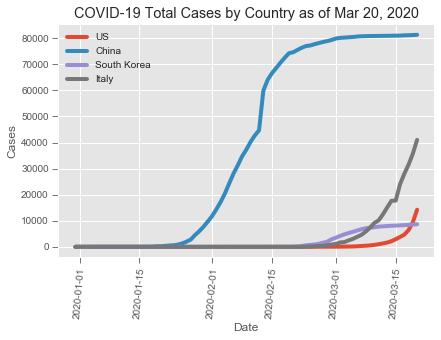

In [139]:
plt.style.use('ggplot')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['US Cases'], label='US')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['China Cases'], label='China')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['South Korea Cases'], label='South Korea')
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['Italy Cases'], label='Italy')
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Cases by Country as of Mar 20, 2020')
plt.ylabel('Cases')
plt.xlabel('Date')
#plt.show()
plt.savefig('COVID-2020-03-20.png', bbox_inches='tight', pad_inches=0.2)

In [ ]:
y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()